In [1]:
import numpy
import pandas as pd
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LogisticRegression, LinearRegression
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification, make_blobs, make_regression

In [2]:
# Linear Regression for Boston house prices

filename = 'housing.csv'
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO',
'B', 'LSTAT', 'MEDV']
dataset = pd.read_csv(filename, delim_whitespace=True, names=names)

In [3]:
# SHAPE OF THE DATASET
print (dataset.shape)
# Describe the dataset
print (dataset.describe())

(506, 14)
             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677082   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861

In [4]:
array = dataset.values
X = array[:,0:13]
Y = array[:,13]
test_size = 0.33
seed = 7
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size,
random_state=seed)
model = LinearRegression()
model.fit(X_train, Y_train)
result = model.score(X_test, Y_test)
finalResult = result*100
print("The Accuracy Score  - {}". format(finalResult))

The Accuracy Score  - 66.63089606572561


In [5]:
kfold = KFold(n_splits=5, random_state=7)
model = LinearRegression()
scoring = 'neg_mean_squared_error'
results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
print("MAE: %.3f (%.3f) " % (results.mean(), results.std()))
print("The Actual result  - {}". format(results))

MAE: -37.132 (23.092) 
The Actual result  - [-12.46030057 -26.04862111 -33.07413798 -80.76237112 -33.31360656]


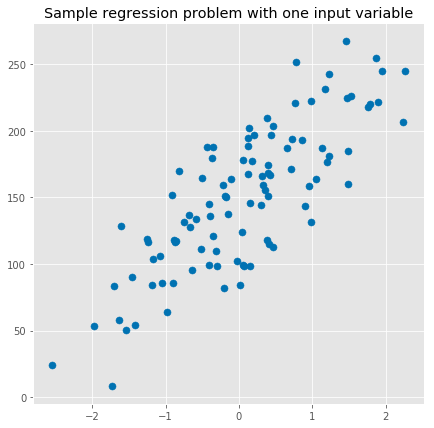

In [6]:
plt.style.use('ggplot')
plt.style.use('seaborn-colorblind')
plt.figure(figsize=(7,7))
plt.title('Sample regression problem with one input variable')
X_R1, y_R1 = make_regression(n_samples = 100, n_features=1,
                            n_informative=1, bias = 150.0,
                            noise = 30, random_state=0)
plt.scatter(X_R1, y_R1, marker= 'o', s=50)
plt.show()

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X_R1, y_R1,random_state = 0)
linreg = LinearRegression().fit(X_train, y_train)

print('linear model coeff (w): {}'.format(linreg.coef_))
print('linear model intercept (b): {:.3f}'.format(linreg.intercept_))
print('R-squared score (training): {:.3f}'.format(linreg.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'.format(linreg.score(X_test, y_test)))

linear model coeff (w): [45.70870465]
linear model intercept (b): 148.446
R-squared score (training): 0.679
R-squared score (test): 0.492


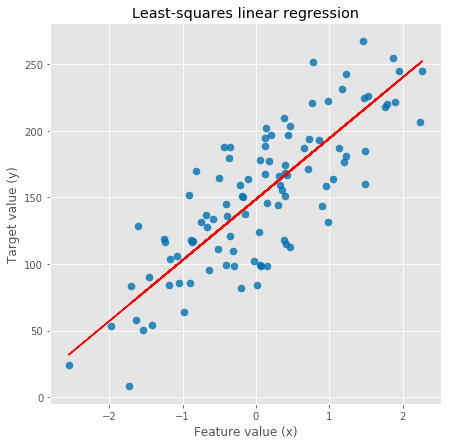

In [8]:
plt.figure(figsize=(7,7))
plt.scatter(X_R1, y_R1, marker= 'o', s=50, alpha=0.8)
plt.plot(X_R1, linreg.coef_ * X_R1 + linreg.intercept_, 'r-')
plt.title('Least-squares linear regression')
plt.xlabel('Feature value (x)')
plt.ylabel('Target value (y)')
plt.show()


In [9]:
df = pd.read_csv('crimedata.csv', sep=',', na_values='?', header=0,encoding='latin=1')
requiredColumns = [5, 6] + list(range(11,26)) + list(range(32, 103)) + [145]  
df = df.iloc[:,requiredColumns].dropna()

X = df.iloc[:,range(0,88)]
y = df['ViolentCrimesPerPop']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)
linearReg = LinearRegression().fit(X_train,y_train)

#print ("Linear Model Intercept - {}".format(linearReg.intercept_))
#print ("Linear Model Coefficient - \n {}".format(linearReg.coef_))
print ("Training Score - {:.3f}".format(linearReg.score(X_train,y_train)))
print ("Testing Score - {:.3f}".format(linearReg.score(X_test,y_test)))

Training Score - 0.673
Testing Score - 0.496


In [11]:
from sklearn.linear_model import Ridge
import numpy as np
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)
ridgeReg = Ridge(alpha=20.0).fit(X_train,y_train)

print ("Training Score - {:.3f}".format(ridgeReg.score(X_train,y_train)))
print ("Testing Score - {:.3f}".format(ridgeReg.score(X_test,y_test)))
print('Number of non-zero features: {}'.format(np.sum(ridgeReg.coef_ != 0)))

Training Score - 0.671
Testing Score - 0.494
Number of non-zero features: 88


In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)

X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.transform(X_test)

ridgeReg = Ridge(alpha=20.0).fit(X_train_scale,y_train)

print ("Training Score - {:.3f}".format(ridgeReg.score(X_train_scale,y_train)))
print ("Testing Score - {:.3f}".format(ridgeReg.score(X_test_scale,y_test)))
print('Number of non-zero features: {}'.format(np.sum(ridgeReg.coef_ != 0)))

Training Score - 0.615
Testing Score - 0.599
Number of non-zero features: 88


C:\Users\User\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [13]:
for newAlpha in [0, 1, 10, 20, 50, 100, 1000]:
    linridge = Ridge(alpha = newAlpha).fit(X_train_scale, y_train)
    r2_train = linridge.score(X_train_scale, y_train)
    r2_test = linridge.score(X_test_scale, y_test)
    num_coeff_bigger = np.sum(abs(linridge.coef_) > 1.0)
    print('Alpha = {:.2f}\nnum abs(coeff) > 1.0: {}, \
r-squared training: {:.2f}, r-squared test: {:.2f}\n'
         .format(newAlpha, num_coeff_bigger, r2_train, r2_test))

Alpha = 0.00
num abs(coeff) > 1.0: 88, r-squared training: 0.67, r-squared test: 0.50

Alpha = 1.00
num abs(coeff) > 1.0: 87, r-squared training: 0.66, r-squared test: 0.56

Alpha = 10.00
num abs(coeff) > 1.0: 87, r-squared training: 0.63, r-squared test: 0.59

Alpha = 20.00
num abs(coeff) > 1.0: 88, r-squared training: 0.61, r-squared test: 0.60

Alpha = 50.00
num abs(coeff) > 1.0: 86, r-squared training: 0.58, r-squared test: 0.58

Alpha = 100.00
num abs(coeff) > 1.0: 87, r-squared training: 0.55, r-squared test: 0.55

Alpha = 1000.00
num abs(coeff) > 1.0: 84, r-squared training: 0.31, r-squared test: 0.30



C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number1.517644e-18
  overwrite_a=True).T


In [14]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Lasso
scaler = MinMaxScaler()
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)

X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.transform(X_test)

LassoReg = Lasso(alpha=2.0, max_iter = 10000).fit(X_train_scale,y_train)

print ("Training Score - {:.3f}".format(LassoReg.score(X_train_scale,y_train)))
print ("Testing Score - {:.3f}".format(LassoReg.score(X_test_scale,y_test)))
print('Number of non-zero features: {}'.format(np.sum(LassoReg.coef_ != 0)))

Training Score - 0.631
Testing Score - 0.624
Number of non-zero features: 20


C:\Users\User\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [15]:
print('Lasso regression: effect of alpha regularization\n\
parameter on number of features kept in final model\n')

for alpha in [0.5, 1, 2, 3, 4, 5, 10, 20, 50]:
    linlasso = Lasso(alpha, max_iter = 10000).fit(X_train_scale, y_train)
    r2_train = linlasso.score(X_train_scale, y_train)
    r2_test = linlasso.score(X_test_scale, y_test)
    
    print('Alpha = {:.2f}\nFeatures kept: {}, r-squared training: {:.2f}, \
r-squared test: {:.2f}\n'.format(alpha, np.sum(linlasso.coef_ != 0), r2_train, r2_test))

Lasso regression: effect of alpha regularization
parameter on number of features kept in final model

Alpha = 0.50
Features kept: 35, r-squared training: 0.65, r-squared test: 0.58

Alpha = 1.00
Features kept: 25, r-squared training: 0.64, r-squared test: 0.60

Alpha = 2.00
Features kept: 20, r-squared training: 0.63, r-squared test: 0.62

Alpha = 3.00
Features kept: 17, r-squared training: 0.62, r-squared test: 0.63

Alpha = 4.00
Features kept: 14, r-squared training: 0.61, r-squared test: 0.62

Alpha = 5.00
Features kept: 12, r-squared training: 0.60, r-squared test: 0.61

Alpha = 10.00
Features kept: 6, r-squared training: 0.57, r-squared test: 0.58

Alpha = 20.00
Features kept: 2, r-squared training: 0.51, r-squared test: 0.50

Alpha = 50.00
Features kept: 1, r-squared training: 0.31, r-squared test: 0.30

